In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [3]:
def intersect(a, b):
    max_intersect_percent=1.5
    ((a_x, a_y), a_radius) = cv2.minEnclosingCircle(a)
    ((b_x, b_y), b_radius) = cv2.minEnclosingCircle(b)
    intersect_Distance=a_radius+b_radius
    x = a_x - b_x
    y = a_y - b_y   
    c = math.sqrt((x * x) + (y * y))
    if intersect_Distance<c*max_intersect_percent:
        return True
    else :
        return False

In [4]:
def coin_find(imge):
    coin_imge=imge.copy()
    gray = cv2.cvtColor(coin_imge, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel, iterations=6)
    cont_img = closing.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    ellipse_list=[]
    coin_count=0
    for cnt in contours:
        st=True
        area = cv2.contourArea(cnt)
        #print(area)
        if area < 400 or area >6000:
            continue
        for test_ellipse in ellipse_list:
            if not intersect(test_ellipse,cnt):
                st=False
                break
        if st:        
            coin_count+=1
            ellipse = cv2.fitEllipse(cnt)
            ellipse_list.append(cnt)
            cv2.ellipse(coin_imge, ellipse, (0,255,0), 2)
            ((x, y), radius) = cv2.minEnclosingCircle(cnt)
            cv2.putText(coin_imge, str(coin_count), (int(x), int(y)),cv2.FONT_HERSHEY_SIMPLEX,1.5, (0, 0, 255), 2)
    return coin_imge

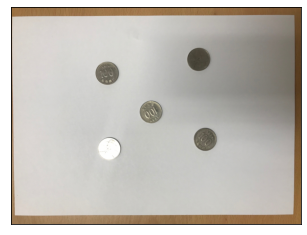

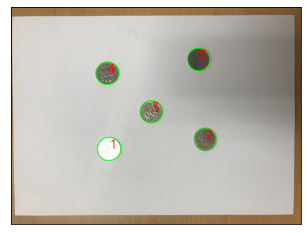

In [5]:
img=cv2.imread('sIMG_8253.JPG')
pltImage(img)

coin_img=coin_find(img)
pltImage(coin_img)

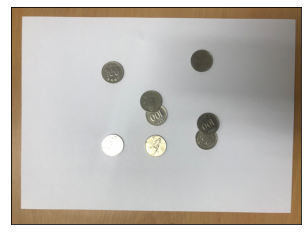

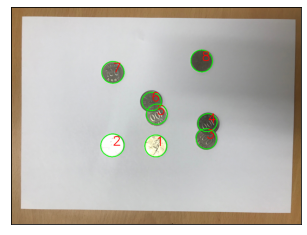

In [6]:
img=cv2.imread('sIMG_8254.JPG')
pltImage(img)
coin_img=coin_find(img)
pltImage(coin_img)